In [31]:
import pandas as pd
import numpy as np
import scipy.io as sc
from datetime import datetime

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from matplotlib.pylab import rcParams

In [2]:
#import social factors
soc_df = pd.read_csv("datasets/after/mergedSOC.csv", index_col=0)
print(soc_df.shape)
soc_df.head()

(51, 336)


,00L13,01L13,02L13,03L13,04L13,05L13,06L13,07L13,08L13,09L13,...,38L19,39L19,40L19,41L19,42L19,43L19,44L19,45L19,46L19,47L19
county,,,,,,,,,,,,,,,,,,,,,
Angelina,8.8,6.8,48.6,19.6,16.3,7.4,14.5,29.6,26.6,6.1,...,28.7,55.5,1.3,3.6,10.9,23.0,51.3,2.9,6.8,16.0
Bastrop,3.1,8.3,50.9,20.1,17.6,10.3,10.1,31.0,24.5,6.6,...,36.0,47.3,1.1,2.2,13.5,27.4,43.3,1.0,11.3,17.0
Bell,5.6,5.5,41.7,16.9,30.3,4.4,4.1,30.2,28.3,10.2,...,33.7,51.8,2.4,2.3,9.8,31.6,45.4,2.1,7.7,13.2
Bexar,6.0,4.9,40.8,20.2,28.0,7.9,8.4,26.5,23.1,7.4,...,42.5,42.5,2.7,2.2,10.1,35.1,39.9,3.7,7.7,13.6
Bowie,1.8,5.8,49.0,23.7,19.6,2.4,9.7,38.2,25.9,5.1,...,32.7,46.2,2.2,3.8,15.2,25.3,48.8,2.5,10.5,12.9


In [3]:
#import hospital discharge data
hd_df = pd.read_csv("datasets/after/mergedIP.csv", index_col=0)
print(hd_df.shape)
hd_df.head()

(51, 28)


,1q13,2q13,3q13,4q13,1q14,2q14,3q14,4q14,1q15,2q15,...,3q17,4q17,1q18,2q18,3q18,4q18,1q19,2q19,3q19,4q19
county,,,,,,,,,,,,,,,,,,,,,
Angelina,3.565987,3.940571,3.754997,4.523638,3.707047,3.832749,3.903598,3.949308,3.908970,3.851704,...,4.003234,4.028282,4.154787,4.004243,4.089779,3.665519,4.223953,4.171425,4.397524,4.285616
Bastrop,0.130571,0.113250,0.091933,0.113250,0.098998,0.092309,0.073580,0.084282,0.098926,0.093650,...,0.047432,0.068651,0.062961,0.046010,0.008475,0.047221,0.049654,0.060294,0.043743,0.046107
Bell,3.785636,3.868283,3.815402,3.759353,3.287451,2.735081,2.534750,3.038192,2.975280,4.917622,...,3.887514,4.000583,3.889837,3.843808,3.747061,3.883680,3.748089,3.744923,3.692818,3.652228
Bexar,3.531182,3.486804,3.540411,3.524118,3.482455,3.460764,3.589123,3.596278,3.654202,3.573107,...,3.611293,3.698055,3.703316,3.632400,3.586749,3.685366,3.561545,3.581422,3.651632,3.656333
Bowie,7.351737,6.449875,6.636281,6.277476,6.476405,6.300118,6.694615,6.729012,6.863795,6.842376,...,6.917786,6.644815,6.440529,6.175073,6.398784,6.352757,6.438186,6.459586,6.438186,6.362216


In [4]:
# mergedSOC_df[[]]
mergedSOC_df = pd.read_csv("datasets/after/mergedSOC.csv", index_col=0)

In [5]:
# factors is an array of dataframes where factors[i] describes the i-th factor.
# For each dataframe, there are 51 rows (number of counties) and 7 columns (number of years)
factors = []
for i in range(0, 48):
    factors.append(mergedSOC_df[[]])

i = 0
for c in mergedSOC_df.columns:
    factors[i] = pd.concat([factors[i], mergedSOC_df.loc[:,c]], axis=1, join='inner')
    factors[i] = factors[i].rename(columns={c: c[-2:]})
    i = (i + 1) % 48

for i in range(0, 48):
    factors[i] = factors[i].transpose()
    factors[i].index.names = ["year"]
    factors[i]["mean"] = factors[i].mean(axis = 1) 
    factors[i]["std"] = factors[i].std(axis = 1)

In [6]:
fac = []

i = 0
for col_idx in range(288): # remove 2019 data
    if col_idx < 48:
        fac.append(mergedSOC_df.iloc[:,col_idx])
    else:
        fac[i] = fac[i].append(mergedSOC_df.iloc[:,col_idx])
    i = (i + 1) % 48

In [7]:
fac[0]

county
Angelina      8.8
Bastrop       3.1
Bell          5.6
Bexar         6.0
Bowie         1.8
             ... 
Victoria      3.0
Walker        2.2
Webb          5.5
Wichita       6.1
Williamson    6.3
Length: 306, dtype: float64

Tutorial Link: https://www.kaggle.com/freespirit08/time-series-for-beginners-with-arima

8. What is ARIMA model?

A. ARIMA(Auto Regressive Integrated Moving Average) is a combination of 2 models AR(Auto Regressive) & MA(Moving Average). It has 3 hyperparameters - P(auto regressive lags),d(order of differentiation),Q(moving avg.) which respectively comes from the AR, I & MA components. The AR part is correlation between prev & current time periods. To smooth out the noise, the MA part is used. The I part binds together the AR & MA parts.

9. How to find value of P & Q for ARIMA ?

A. We need to take help of ACF(Auto Correlation Function) & PACF(Partial Auto Correlation Function) plots. ACF & PACF graphs are used to find value of P & Q for ARIMA. We need to check, for which value in x-axis, graph line drops to 0 in y-axis for 1st time.
From PACF(at y=0), get P
From ACF(at y=0), get Q

In [8]:
fac_time = []

for i in range(48):
    fac_time.append(pd.DataFrame(fac[i], columns = ["hospital discharge percentage"]).reset_index(drop=True))
    fac_time[i].index.names = ["time"]

In [9]:
fac_time[0]

,hospital discharge percentage
time,
0,8.8
1,3.1
2,5.6
3,6.0
4,1.8
...,...
301,3.0
302,2.2
303,5.5


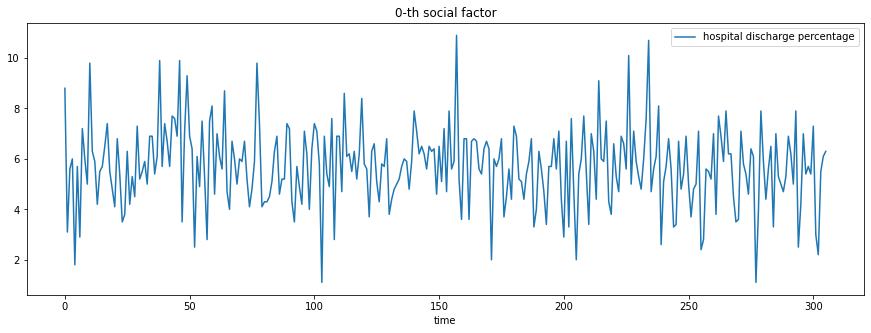

In [10]:
# let's first consider 0-th social factor
fac_time[0].plot(figsize=(15,5), title="0-th social factor")
plt.show()

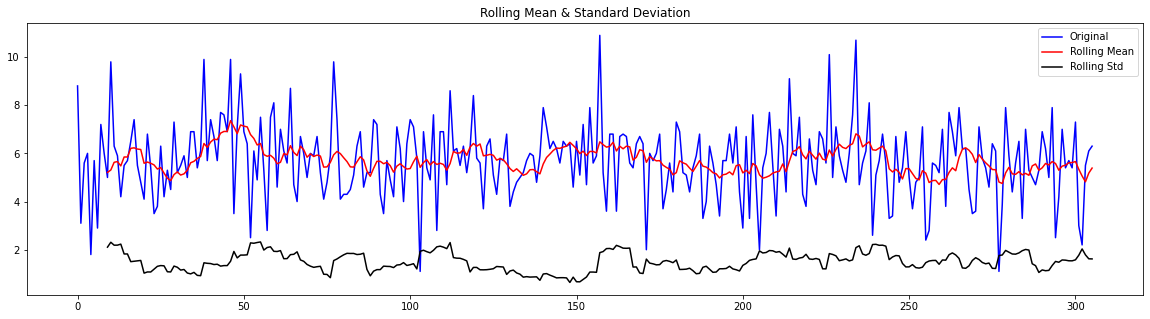

In [11]:
#Determine rolling statistics
rolmean = fac_time[0].rolling(window=10).mean()
rolstd = fac_time[0].rolling(window=10).std()

#Plot rolling statistics
plt.figure(figsize=(20,5)) 
orig = plt.plot(fac_time[0], color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [12]:
#Perform Augmented Dickey–Fuller test:
print('Results of Dickey Fuller Test:')
dftest = adfuller(fac_time[0]["hospital discharge percentage"], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Results of Dickey Fuller Test:
Test Statistic                -6.738239e+00
p-value                        3.167037e-09
#Lags Used                     4.000000e+00
Number of Observations Used    3.010000e+02
Critical Value (1%)           -3.452263e+00
Critical Value (5%)           -2.871191e+00
Critical Value (10%)          -2.571912e+00
dtype: float64


For a Time series to be stationary, its ADCF test should have:

1. p-value to be low (according to the null hypothesis)
2. The critical values at 1%,5%,10% confidence intervals should be as close as possible to the Test Statistics

Log Scale Transformation 

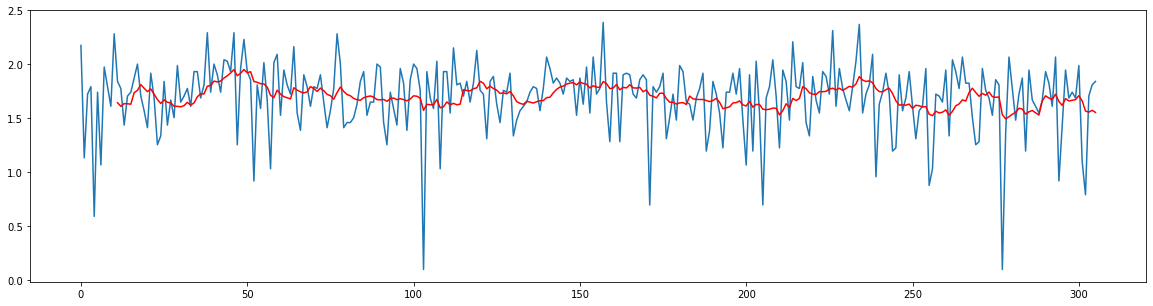

Results of Dickey Fuller Test:
Test Statistic                -7.438603e+00
p-value                        6.089576e-11
#Lags Used                     5.000000e+00
Number of Observations Used    2.890000e+02
Critical Value (1%)           -3.453182e+00
Critical Value (5%)           -2.871593e+00
Critical Value (10%)          -2.572127e+00
dtype: float64


In [23]:
#Estimating trend
fac_time_logScale = []
fac_time_logScale.append(np.log(fac_time[0]))

#The below transformation is required to make series stationary
plt.figure(figsize=(20,5)) 
movingAverage = fac_time_logScale[0].rolling(window=12).mean()
movingSTD = fac_time_logScale[0].rolling(window=12).std()
plt.plot(fac_time_logScale[0])
plt.plot(movingAverage, color='red')
plt.show()

datasetLogScaleMinusMovingAverage = fac_time_logScale[0] - movingAverage
datasetLogScaleMinusMovingAverage.head(12)

#Remove NAN values
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10)

#Determine rolling statistics
movingAverage = datasetLogScaleMinusMovingAverage.rolling(window=12).mean()
movingSTD = datasetLogScaleMinusMovingAverage.rolling(window=12).std()

#Perform Dickey–Fuller test:
print('Results of Dickey Fuller Test:')
dftest = adfuller(datasetLogScaleMinusMovingAverage["hospital discharge percentage"], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

In [14]:
model = ARIMA(fac_time_logScale[0], order=(2,1,2))
results_ARIMA = model.fit(disp=-1)

/Users/didyxdi/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


Prediction

In [15]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

time
1   -0.000325
2    0.469595
3    0.085001
4   -0.192532
5    0.948603
dtype: float64


In [16]:
#Convert to cumulative sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum)

time
1     -0.000325
2      0.469269
3      0.554270
4      0.361738
5      1.310342
         ...   
301   -5.376297
302   -4.866611
303   -3.900882
304   -3.920547
305   -4.121439
Length: 305, dtype: float64


In [18]:
predictions_ARIMA_log = pd.Series(fac_time[0]["hospital discharge percentage"].iloc[0], index=fac_time_logScale[0].index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log.head()

time
0    8.800000
1    8.799675
2    9.269269
3    9.354270
4    9.161738
dtype: float64

In [21]:
fac_time_logScale[0].head()

,hospital discharge percentage
time,
0,2.174752
1,1.131402
2,1.722767
3,1.791759
4,0.587787


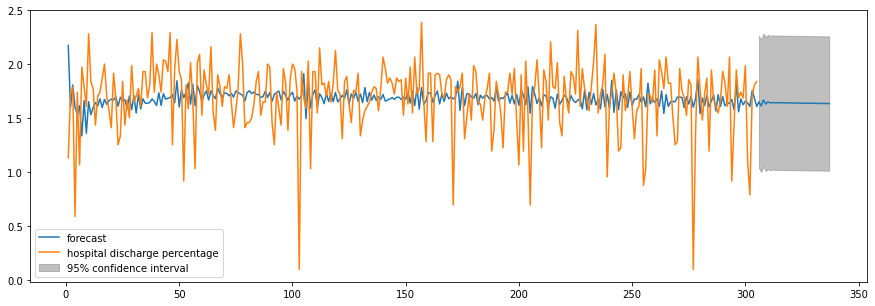

In [33]:
with mpl.rc_context():
    mpl.rc("figure", figsize=(15,5))
    results_ARIMA.plot_predict(1,337)
